In [19]:
%pip install opencv-python
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

%matplotlib inline


from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
import pickle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


(9164, 62, 47)


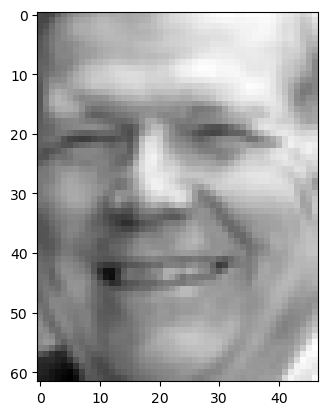

In [28]:
dataset = fetch_lfw_people(min_faces_per_person=2).images
print(dataset.shape)

plt.imshow(dataset[0], cmap='gray')

In [21]:
dataset = dataset.reshape((dataset.shape[0], dataset.shape[1] * dataset.shape[2]))
print(dataset.shape)

(9164, 2914)


In [22]:
M = dataset.mean(axis=0)
dataset -= M
scaler = max(dataset.max(), -dataset.min())
dataset /= scaler
print(dataset.shape)

(9164, 2914)


In [23]:
U, S, Vt = np.linalg.svd(dataset)
print(U.shape, S.shape, Vt.shape)

(9164, 9164) (2914,) (2914, 2914)


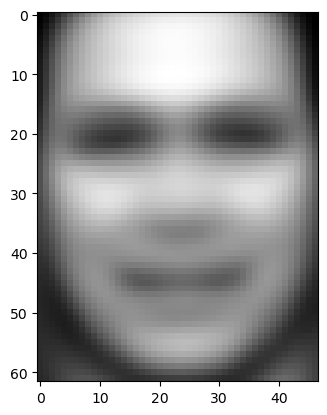

In [32]:
plt.imshow(((Vt[0] * scaler) + M).reshape(62, 47), cmap='gray')

In [34]:
np.save("basis.npy", Vt)
with open("vars.pkl", "wb") as f:
    pickle.dump((M, scaler), f)